In [168]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path    as mpath
import matplotlib.patches as mpatches
from matplotlib.collections import LineCollection, PathCollection

import MyChord

%load_ext autoreload
%autoreload 2

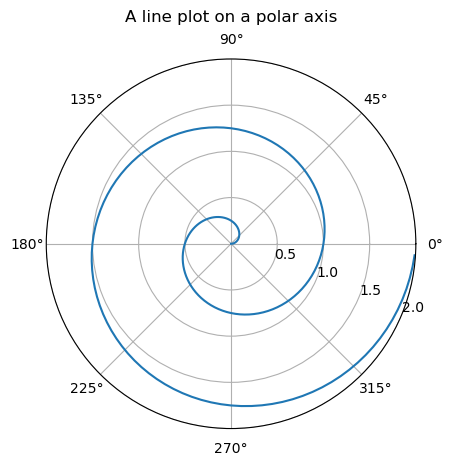

In [2]:
import numpy as np
import matplotlib.pyplot as plt

r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

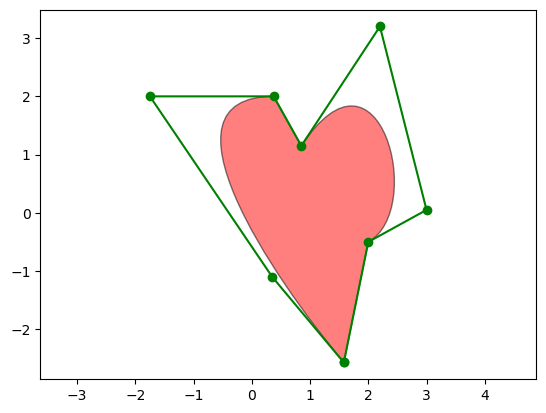

In [3]:
fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

# ax.grid()
ax.axis('equal')
plt.show()

In [97]:
verts = patch.get_verts()
verts.shape, verts

((25, 2),
 array([[328.        , 417.89268293],
        [332.42504819, 406.97652439],
        [341.27514457, 387.2570122 ],
        [350.12524094, 370.35457317],
        [358.97533732, 356.26920732],
        [367.8254337 , 345.00091463],
        [374.46300598, 338.39839939],
        [378.88805417, 334.87705793],
        [383.31310236, 332.05998476],
        [387.73815055, 329.94717988],
        [392.16319874, 328.53864329],
        [396.58824693, 327.834375  ],
        [401.01329512, 327.834375  ],
        [405.43834331, 328.53864329],
        [409.86339149, 329.94717988],
        [414.28843968, 332.05998476],
        [418.71348787, 334.87705793],
        [423.13853606, 338.39839939],
        [429.77610834, 345.00091463],
        [438.62620472, 356.26920732],
        [447.4763011 , 370.35457317],
        [456.32639748, 387.2570122 ],
        [465.17649386, 406.97652439],
        [469.60154204, 417.89268293],
        [328.        , 417.89268293]]))

(-1.1, 1.1)

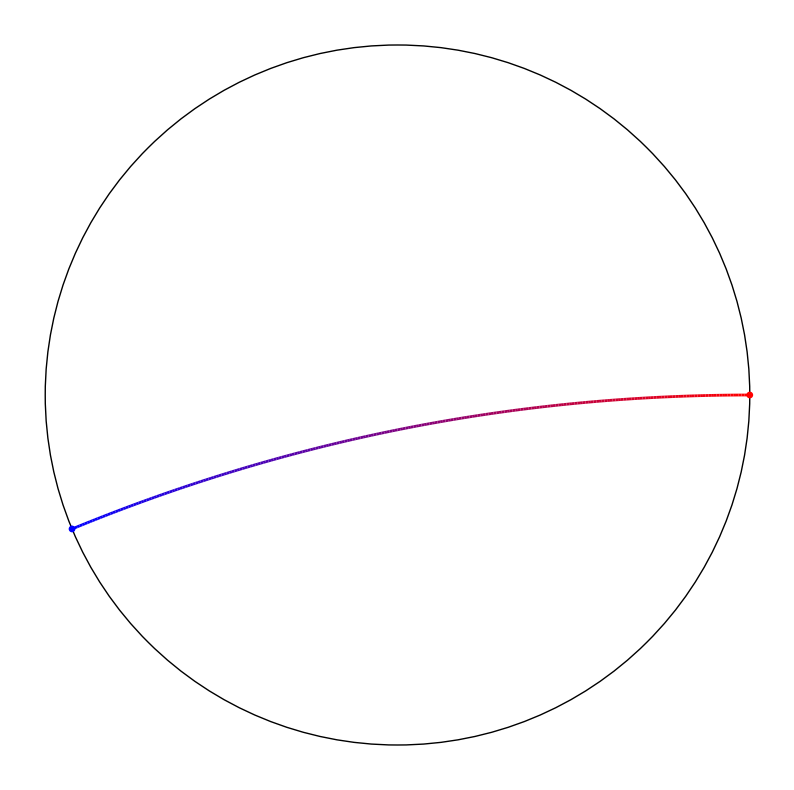

In [53]:
r = 1
degrees = np.arange(0, 2 * np.pi, np.pi / 8)  # (0, 22.5, 45, 67.5, ...)

fig, ax = plt.subplots(figsize=(10, 10))

# convert from polar coordinates to cartesian coordinates
X = r * np.cos(degrees[[0, 9]])
Y = r * np.sin(degrees[[0, 9]])

# compute the quadratic Bezier curve
t = np.linspace(0, 1, 256)
x = (1-t)**2 * X[0] + t**2 * X[1]
y = (1-t)**2 * Y[0] + t**2 * Y[1]

# split the curve into segments
route = np.stack([x, y], axis=1)
idxs = np.array(range(route.shape[0]))  # (0, 1, 2, ..., N-1)
norm = plt.Normalize(idxs[0], idxs[-1])
segments = np.stack([route[:-1], route[1:]], axis=1)

colors = [(1, 0, 0), (0, 0, 1)]  # R -> G -> B
cmap_name = 'my_list'
# my_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)
# my_cmap = LinearSegmentedColormap.from_list(cmap_name, ["darkorange", "gold", "lawngreen", "lightseagreen"], N=256)
my_cmap = LinearSegmentedColormap.from_list(cmap_name, ["red", "blue"], N=256)
# my_cmap = ListedColormap(my_cmap(np.linspace(0, 1, 100)), cmap_name)
# my_cmap = mpl.colormaps['viridis']
lc = LineCollection(segments, cmap=my_cmap, norm=norm)
lc.set_array(idxs)
lc.set_linewidth(2)
line = ax.add_collection(lc)

# draw the outer circle
circle = mpatches.Circle((0, 0), r, color='black', fill=False)
ax.add_artist(circle)

# draw two ends
# cmap_ends = my_cmap.colors[[0, -1]]
cmap_ends = my_cmap([0, 1.])
ax.scatter(X, Y, c=cmap_ends, s=15)

ax.set_axis_off()
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

# fig.show()

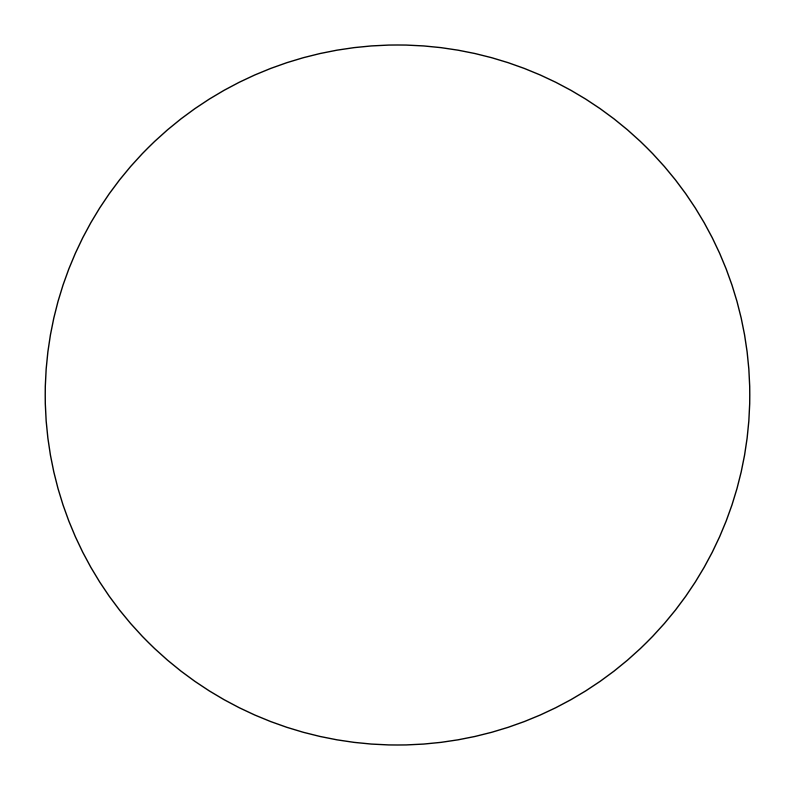

In [197]:
graph = chord.Chord()

In [198]:
cmap1 = graph.get_cmap(['red', 'blue'])
cmap2 = graph.get_cmap(['green', 'gold'])

In [221]:
graph.remove_curves()
graph.add_curve(start_end=np.array((0, 30)) / 180 * np.pi, cmap=cmap1)
graph.add_curve(start_end=np.array((-45, 210)) / 180 * np.pi, cmap=cmap2)

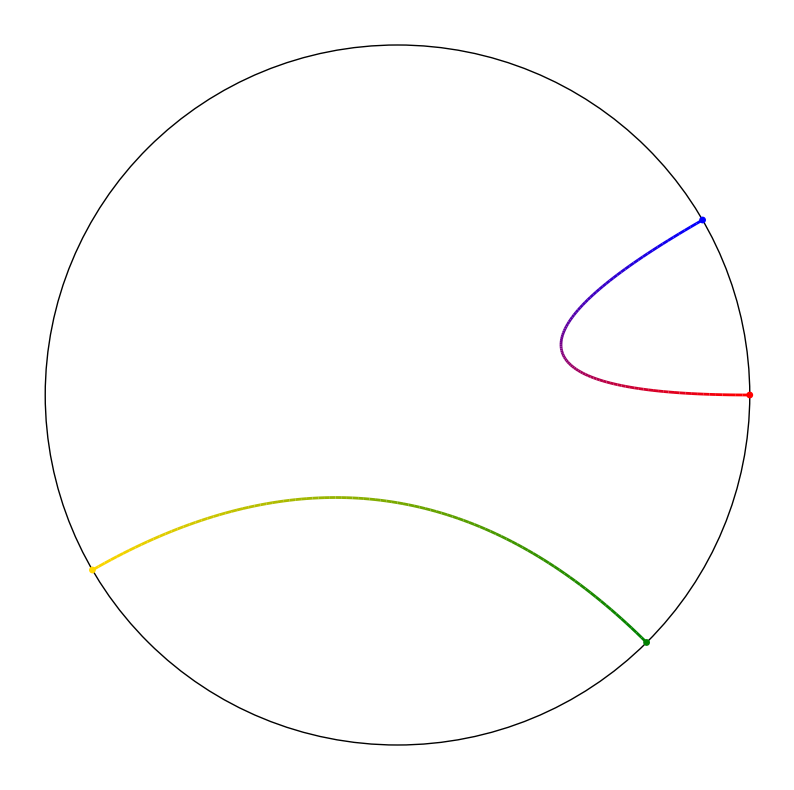

In [222]:
graph.get_fig()

In [169]:
type(graph.ax.collections[0]) in [PathCollection]

True

(0.0, 1.0)

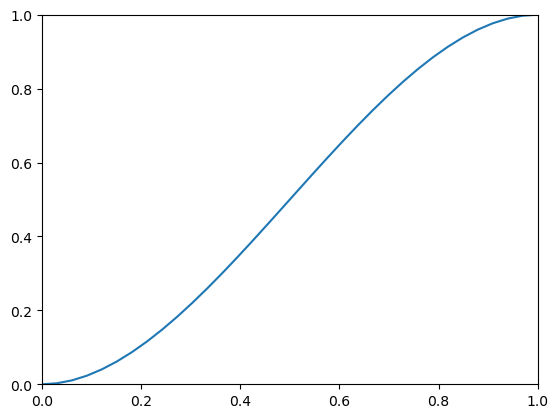

In [19]:
X = [0, 1/3, 2/3, 1]
Y = [0, 0, 1, 1]
t = np.linspace(0, 1, 34)
x = (1-t)**3 * X[0] + 3*t*(1-t)**2 * X[1] + 3*t**2*(1-t) * X[2] + t**3 * X[3]
y = (1-t)**3 * Y[0] + 3*t*(1-t)**2 * Y[1] + 3*t**2*(1-t) * Y[2] + t**3 * Y[3]
plt.plot(x, y)
plt.xlim(0, 1)
plt.ylim(0, 1)